<b>이미지 라벨링</b><br>
파일명에 라벨 포함<br>
파일명에서 클래스 정보 추출 <br>
산과 바다 구분

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
IMG_CHANNELS = 3
IMG_ROWS = 64
IMG_COLS = 64
CLASSES = 2  # 산, 바다

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파일 경로에 대한 glob 패턴을 수정하세요.
mountain_files = glob('/content/drive/MyDrive/CNN/m_c/m/*jpg')
sea_files = glob('/content/drive/MyDrive/CNN/m_c/s/*jpg')

# 이미지와 라벨을 불러오는 함수 정의
def load_images_and_labels(files, label):
    images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in files]
    labels = [label] * len(files)
    return images, labels

# 산과 바다 이미지 및 라벨 불러오기
mountain_images, mountain_labels = load_images_and_labels(mountain_files, 0)  # 산을 0으로 라벨링
sea_images, sea_labels = load_images_and_labels(sea_files, 1)  # 바다를 1로 라벨링

# 이미지와 라벨 병합
images = mountain_images + sea_images
y = mountain_labels + sea_labels

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (109542160 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [ ]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [ ]:
# 이미지 벡터화
image_vector = np.asarray([image.img_to_array(img) for img in images])

In [ ]:
image_vector[0]

In [ ]:
image_vector.shape

(374, 64, 64, 3)

In [ ]:
image_vector[0].shape

(64, 64, 3)

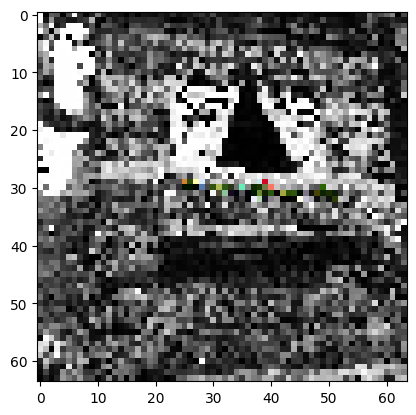

In [ ]:
plt.imshow(image_vector[0]/255)

In [ ]:
# y=[1] * 1000 + [0] * 1000

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape

(299, 64, 64, 3)

In [ ]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
y_train[200]

array([0., 1.], dtype=float32)

In [ ]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
3/3 [==============================] - 2s 324ms/step - loss: 1.8994 - accuracy: 0.4907 - val_loss: 1.4340 - val_accuracy: 0.5667
Epoch 2/50
3/3 [==============================] - 1s 241ms/step - loss: 1.2077 - accuracy: 0.4944 - val_loss: 0.6968 - val_accuracy: 0.5667
Epoch 3/50
3/3 [==============================] - 1s 356ms/step - loss: 0.7031 - accuracy: 0.4944 - val_loss: 0.6913 - val_accuracy: 0.7667
Epoch 4/50
3/3 [==============================] - 3s 782ms/step - loss: 0.6880 - accuracy: 0.5911 - val_loss: 0.7099 - val_accuracy: 0.5667
Epoch 5/50
3/3 [==============================] - 2s 675ms/step - loss: 0.7042 - accuracy: 0.5019 - val_loss: 0.6928 - val_accuracy: 0.5333
Epoch 6/50
3/3 [==============================] - 3s 525ms/step - loss: 0.6909 - accuracy: 0.6245 - val_loss: 0.6844 - val_accuracy: 0.6000
Epoch 7/50
3/3 [==============================] - 1s 337ms/step - loss: 0.6875 - accuracy: 0.6022 - val_loss: 0.6879 - val_accuracy: 0.5667
Epoch 8/50
3/3 [====

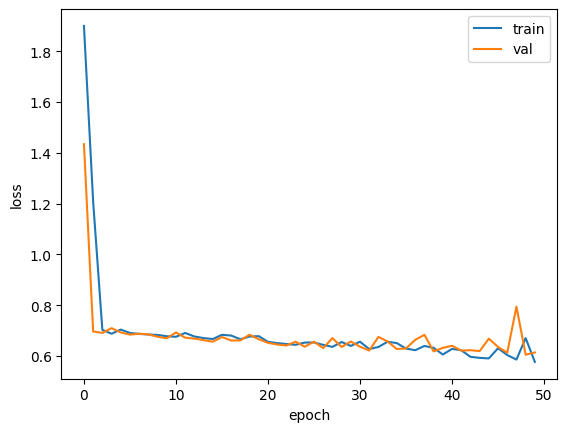

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

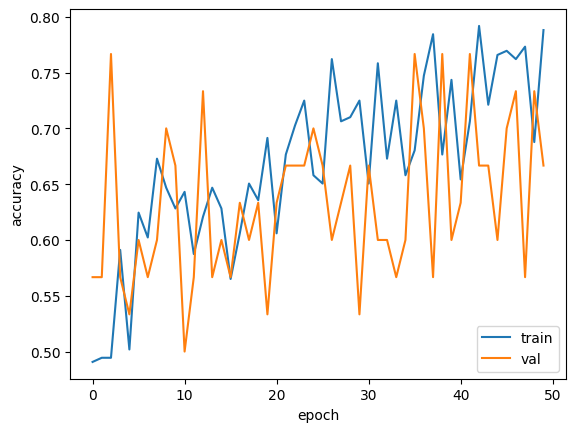

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 19ms/step - loss: 0.6874 - accuracy: 0.6267

Test loss: 0.6873771548271179
Test accuracy: 0.6266666650772095
